In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import json

In [0]:
dir = '/content/drive/My Drive/DataScienceWiz/steam_webscraping/'

In [0]:
with open((dir + 'user_inventory_sample.txt'), 'r') as myfile:
  data = myfile.readlines()

In [0]:
type(data)

list

In [0]:
dic = eval(data[0])
dic

{'76561198158086086': [{'appid': 4000,
   'playtime_2weeks': 49,
   'playtime_forever': 370},
  {'appid': 110800, 'playtime_forever': 9},
  {'appid': 226320, 'playtime_forever': 0},
  {'appid': 250320, 'playtime_2weeks': 79, 'playtime_forever': 507},
  {'appid': 296470, 'playtime_2weeks': 68, 'playtime_forever': 78},
  {'appid': 301520, 'playtime_forever': 20},
  {'appid': 205790, 'playtime_forever': 0},
  {'appid': 730, 'playtime_2weeks': 114, 'playtime_forever': 5973},
  {'appid': 218620, 'playtime_forever': 54},
  {'appid': 352460, 'playtime_forever': 36},
  {'appid': 34270, 'playtime_forever': 0},
  {'appid': 205230, 'playtime_forever': 1},
  {'appid': 205950, 'playtime_forever': 0}]}

#### Users' Data Preprocessing

In [0]:
with open(dir+'user_inventory_sample.txt','r') as f:
  data_user = f.readlines()

In [0]:
%%time
temp = []
for i in data_user:
  d = json.loads(i)
  for k, v in d.items():
    a = pd.DataFrame(v)
    a['userID'] = k
  temp.append(a)

output = pd.concat(temp)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


CPU times: user 10 s, sys: 89.7 ms, total: 10.1 s
Wall time: 10.1 s


In [0]:
output_user = output.copy()

In [0]:
output_user.head()

,appid,playtime_2weeks,playtime_forever,userID
0,4000.0,49.0,370.0,76561198158086086
1,110800.0,NaN,9.0,76561198158086086
2,226320.0,NaN,0.0,76561198158086086
3,250320.0,79.0,507.0,76561198158086086
4,296470.0,68.0,78.0,76561198158086086


In [0]:
output_user['appid'] = output_user['appid'].astype(int)
output_user.head()

,appid,playtime_2weeks,playtime_forever,userID
0,4000,49.0,370.0,76561198158086086
1,110800,NaN,9.0,76561198158086086
2,226320,NaN,0.0,76561198158086086
3,250320,79.0,507.0,76561198158086086
4,296470,68.0,78.0,76561198158086086


In [0]:
# Number of total user playing info
output_user.shape

(393362, 4)

In [0]:
# Number of NaN -- # of appid
output_user['appid'].isna().sum()

0

In [0]:
# Number of NaN -- # of playtime 2 weeks
output_user['playtime_2weeks'].isna().sum()/output_user.shape[0]

0.9577437576583402

In [0]:
# Number of NaN -- # of playtime forever
output_user['playtime_forever'].isna().sum()

0

#### Delete playtime_2weeks

In [0]:
user = output_user[['userID','appid','playtime_forever']]
user.head()

,userID,appid,playtime_forever
0,76561198158086086,4000,370.0
1,76561198158086086,110800,9.0
2,76561198158086086,226320,0.0
3,76561198158086086,250320,507.0
4,76561198158086086,296470,78.0


#### Save the User Data

In [0]:
#dataframe.to_csv("test.csv",index=False,sep=',')
user.to_csv(dir + 'user.csv')

#### Basic Analysis of User

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
#groupedBySteamid = user.groupby(by = "userID").count()
#groupedBySteamid

In [0]:
groupedByAppid = user.groupby(by = "appid")["userID"].count()

In [0]:
elbow_apps = groupedByAppid.groupby(groupedByAppid).count()
x, y = elbow_apps.index, elbow_apps.values

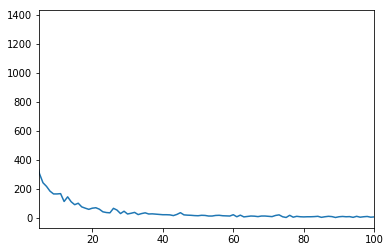

In [0]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim([5,100])
plt.show()

#### Standarized playtime 

In [0]:
user_grp = user.groupby(by = "appid")
user_mean = user_grp.mean()["playtime_forever"]
user_std = user_grp.std()["playtime_forever"]

In [0]:
user_mean.head()

appid
10    3287.707083
20      50.587379
30      82.552632
40       7.039394
50      71.460808
Name: playtime_forever, dtype: float64

In [0]:
# normalization function
def normalize_by_group(df, by):
    groups = df.groupby(by)
    # computes group-wise mean/std,
    # then auto broadcasts to size of group chunk
    mean = groups.transform(np.mean)
    std = groups.transform(np.std)
    return (df[mean.columns] - mean) / std

In [0]:
mu_user = user.groupby("appid").transform('mean')
st_user = user.groupby("appid").transform('std')

In [0]:
user["pl_st"] = (user["playtime_forever"] - mu_user["playtime_forever"]) / st_user["playtime_forever"]

In [0]:
user.head()

,userID,appid,playtime_forever,pl_st
0,76561198158086086,4000,370.0,-0.423320
1,76561198158086086,110800,9.0,-0.621365
2,76561198158086086,226320,0.0,-0.186106
3,76561198158086086,250320,507.0,0.064789
4,76561198158086086,296470,78.0,-0.371237


In [0]:
with open(dir+'app_detail.txt','r') as f:
  data_app = f.readlines()

In [0]:
data_app[0]

'{"221540": {"steam_appid": 221540, "website": "http://www.hiddenpath.com/games/defense-grid-2/", "price_overview": {"currency": "USD", "initial": 1499, "final": 1499, "discount_percent": 0}, "platforms": {"windows": true, "mac": true, "linux": true}, "detailed_description": "Defense Grid 2, DG2, is the highly-anticipated sequel to Hidden Path Entertainment\\u2019s 2008 Defense Grid: The Awakening.  Setting the bar as the definitive tower defense game, Defense Grid 2 introduces new worlds and threats to test your tower placement strategies.  With a bold new look, a compelling single-player campaign, and the addition of new game modes, online player-versus-player and multiplayer co-op, every play-through brings fun new opportunities and challenges.<br />\\r\\n<br />\\r\\nDG2 comes with a story campaign featuring 21 stunning maps, dynamic level movement, an expanded story and cast of characters, hundreds of challenge mode experiences, new multiplayer modes, a procedurally driven audio sc